# <font color="red">Hackday - Dados Inglórios</font>

## Planejamento da Solução

### Input

**Problema de Negócio**

A inclusão financeira continua a ser um dos principais obstáculos ao desenvolvimento econômico e humano na África. Por exemplo, no Quênia, Ruanda, Tanzânia e Uganda, apenas 9,1 milhões de adultos (14% dos adultos), têm acesso ou usam uma conta bancária comercial.

Em 2008, o nível de inclusão financeira na África Subsaariana era de pouco mais de 23%. Em 2018, esse número quase dobrou. No Togo, Mazamesso Assih, ministro de finanças, coordena uma estratégia de inclusão financeira com bancos parceiros. Ele afirma que garantir acesso a serviços financeiros básicos para a população, é fundamental para impulsionar a economia Africana.

Em 2022, conforme destacado no último relatório do Banco Central da África Ocidental, atingiu-se uma das mais altas taxas de inclusão financeira da região, próxima de 82%. Uma parcela significativa desse aumento veio do aumento dos serviços financeiros digitais.

Assih afirma também, que existem três razões principais pelas quais as nações africanas devem apostar na inclusão financeira:

 1. Tornar os serviços financeiros mais acessíveis promove o empoderamento das pessoas mais vulneráveis, especialmente as mulheres.
 2. Combater redes criminosas, passar de uma economia exclusivamente monetária para uma infraestrutura financeira digital torna mais fácil para as autoridades rastrear transações e lidar com contrabandistas e traficantes.
 3. impulsionará a conectividade dos setores público e privado para um crescimento sustentável, apoiando as start-ups africanas.
 
O objetivo desta competição é criar um modelo de aprendizado de máquina para prever quais indivíduos vão ou não utilizar uma conta bancária. Os modelos e soluções desenvolvidos devem fornecer uma indicação do estado da inclusão financeira no Quênia, Ruanda, Tanzânia e Uganda.



**Dados**

Os dados necessários podem ser encontrados no [repositório da atividade](https://www.kaggle.com/c/inclusao-financeira-na-africa). No arquivo train.csv você encontrará:

|Feature|Descrição|
|:------|:--------|
|country| Pais de Origem.
|year| Ano da Inclusão
|uniqueid| Id do Usuário.
|bank_account| Possui ou Não a Conta no Banco.
|location_type| Tipo de Localidade (Rural...)
|cellphone_access| Possui ou Não Celular.
|household_size| Tamanho da Casa.
|age_of_respondent| Idade do Usuário.
|gender_of_respondent| Gênero do Usuário.
|relationship_with_head| Status com o Dono da Conta.
|marital_status| Situação Civil.
|education_level| Nível de Educação.
|job_type| Tipo de Trabalho.

### Output

Um arquivo CSV com a previsão do modelo dizendo quais clientes abrirão uma conta digital em duas colunas:  

|uid|	bank_account|
|:--|:--------------|
|Rwanda_uniqueid_625|	No|
|Rwanda_uniqueid_1561|	No|
|Rwanda_uniqueid_4806|	No|
|Tanzania_uniqueid_4902|	Yes|
|Rwanda_uniqueid_980|	No|
|Rwanda_uniqueid_7043|	No|

### Tasks

- Descrição dos Dados
    - Renomear colunas
    - Checar dimenões
    - Checar tipos
    - Alterar tipos
    - Checar vazios
    - Preencher os vazios
    - Descrições Estatísticas

- Feature Engineering
    - Mapa de hipóteses
    - Criação de hipóteses
- Seleção de features (Filtro)
- EDA
    - Univariada
    - Bivariada (teste de hipóteses)
    - Multivariadas
- Preparação dos dados
    - Rescala das features
- Seleção de features
- Construção do modelo
    - modelos de classificação
    - guideline
- Avaliação do modelo
- Fine Tuning
- CSV Final

## 0. Settings

### 0.1. Imports

In [42]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

# scikit-learn
from sklearn import model_selection as ms
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### 0.2. Helper Functions

In [28]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### 0.3. Data Loading

In [29]:
train_file = './data/train.csv'

df_raw = pd.read_csv(train_file)
df_raw.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


## 1. Descrição dos Dados

In [30]:
df1 = df_raw.copy()

### 1.1. Renomear features

### 1.2. Checar Dimensões

### 1.3. Checar Tipos

### 1.4. Alterar Tipos

### 1.5. Checa NaN

In [31]:
df1.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
uid                       0
bank_account              0
dtype: int64

### 1.6. Preenche NaN

### 1.7. Estatística Descritiva

## 2. Feature Engineering

In [32]:
df2 = df1.copy()

### 2.1. Mapa de Hipóteses

### 2.2. Criação de Hipóteses

## 3. Seleção de Features

In [33]:
df3 = df2.copy()

## 4. EDA

In [34]:
df4 = df3.copy()

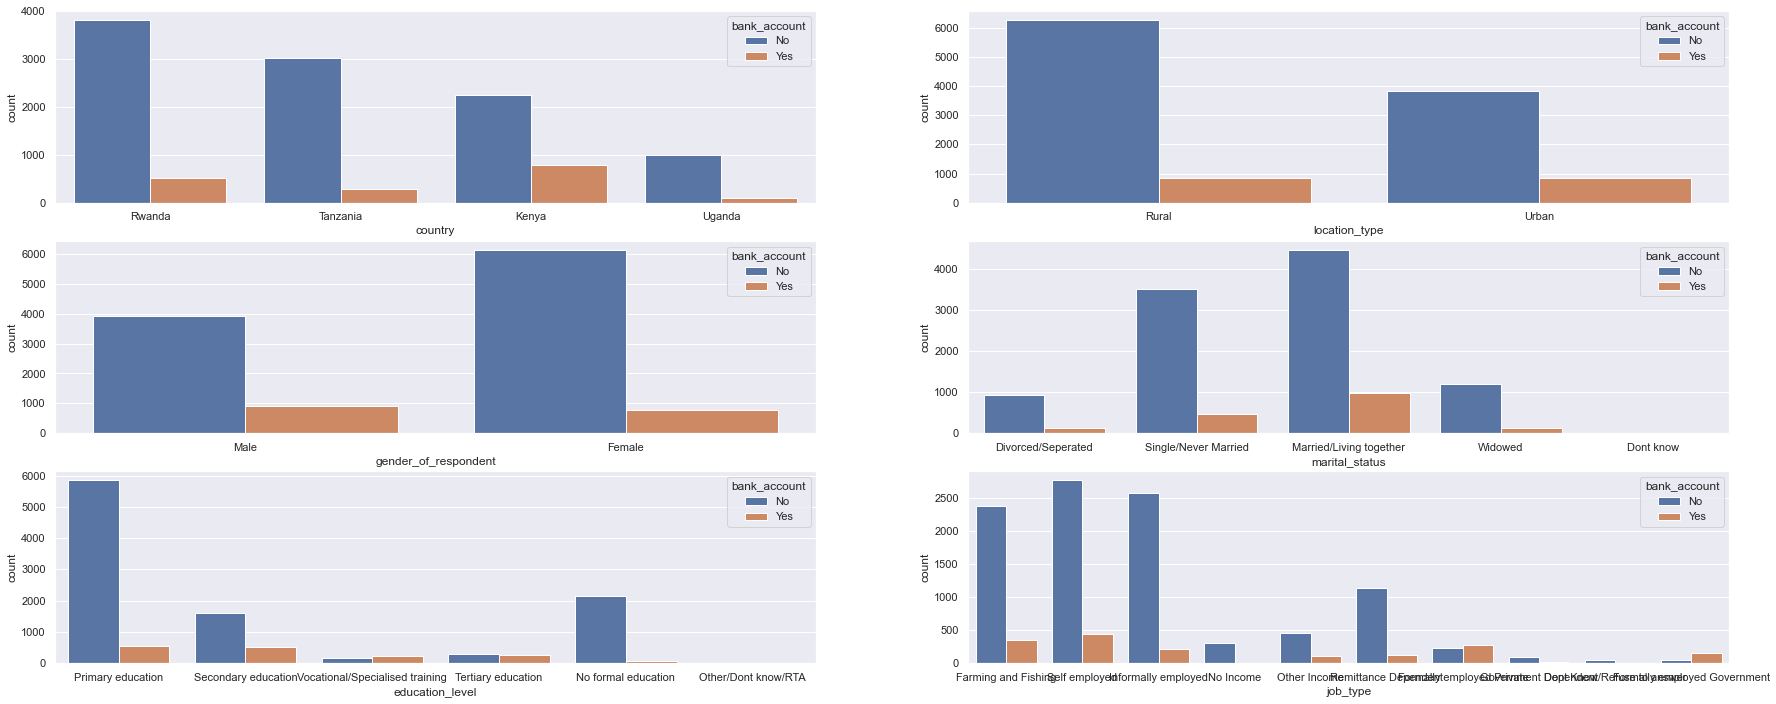

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(30, 12))
sns.countplot(x='country',hue = 'bank_account', data = df4, ax=ax[0][0])
sns.countplot(x='location_type', hue = 'bank_account',data = df4, ax=ax[0][1])
sns.countplot(x='gender_of_respondent', hue = 'bank_account',data = df4, ax=ax[1][0])
sns.countplot(x='marital_status', hue = 'bank_account',data = df4, ax=ax[1][1])
sns.countplot(x='education_level', hue = 'bank_account', data = df4, ax = ax[2][0])
sns.countplot(x='job_type', hue = 'bank_account', data = df4, ax = ax[2][1]);

### 4.1. Univariada

### 4.2. Bivariadas

### 4.3. Multivariadas

## 5. Preparação dos Dados

In [36]:
df5 = df4.copy()

### 5.1. Reescala dos Dados

## 6. Seleção de Features

In [37]:
df6 = df5.copy()

### 6.1. Separação de Treino e Teste

In [38]:
df6.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


In [39]:
X = df6.select_dtypes(include=['int64', 'float64'])
y = df6['bank_account'].apply(lambda x: 1 if x == 'Yes' else 0)

x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

## 7. Construção do Modelo

### 7.1. Random Forest Classifier

In [40]:
# criar o modelo
rfc_model = ensemble.RandomForestClassifier(random_state=42)

# treinar o modelo
rfc_model.fit(x_train, y_train)

# fazer a predição
yhat_rfc = rfc_model.predict(x_test)

# calcula a performance
metrics.f1_score(y_test, yhat_rfc)

0.12112259970457902

## 8. Avaliação do Modelo

## 9. Fine Tunning

In [48]:
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [49]:
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

steps = [('rf',RandomForestClassifier(random_state=42))]

# Specify the hyperparameter space
parameters = {'rf__n_estimators':np.arange(1,50),
              'rf__max_depth':[5,25,50],
              'rf__criterion':['gini','entropy']}

rf_cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)


y_pred = rf_cv.predict(x_test)

print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

## 10. Output da Submissão

In [ ]:
x_test.head()

In [ ]:
y_test[0:5]